In [10]:
from cgitb import strong
from urllib import request
import pandas as pd
from bs4 import BeautifulSoup
import requests
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import os
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = PorterStemmer()  
nltk.download('punkt')
dataset = pd.read_csv('vin.csv', on_bad_lines='skip', sep = ';')

dataset = dataset.sort_values("variety")
reviews = dataset["description"]
reviews[32]

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     corentin.dero@stud-57bbf/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     corentin.dero@stud-57bbf/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


"Underbrush, scorched earth, menthol and plum steeped in spirits are some of the aromas that unfold on the glass. The big, chewy palate doles out ripe wild cherry, raspberry jam, ground pepper and licorice alongside firm, velvety tannins. You'll also detect the warmth of alcohol on the finish."

In [11]:

def review_to_words(raw_review):  
    # 1. Remove non-letters   
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)   
    #  
    # 2. Convert to lower case, split into individual words  
    words = letters_only.lower().split()  
    #  
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching  
    # a list, so convert the stop words to a set  
    stops = set(stopwords.words("english"))   
    #   
    # 4. Remove stop words  
    meaningful_words = [w for w in words if not w in stops] #returns a list   
    #  
    # 5. Stem words. Need to define porter stemmer above  
    #singles = [stemmer.stem(word) for word in meaningful_words]  
    # 6. Join the words back into one string separated by space,   
    # and return the result.  
    #return( " ".join( singles )) 
    return( " ".join( meaningful_words ))


In [13]:
#I only keep the colmuns that I am interested in
bagofwords = dataset[['description','variety']]
onebag = bagofwords.loc[bagofwords['variety'] == 'Pinot Noir']

onebag = onebag['description']

# Function to transform a df into a list
def to_list(df):
    listt = []
    for i in range(len(onebag)):
        onebag.iloc[i] = review_to_words(onebag.iloc[i])
        text_tokens = word_tokenize(onebag.iloc[i])
        listt.append(text_tokens)
    return listt


text_tokens = to_list(onebag)
text_tokens[0]



                                              description     variety
31445   A light mauve in color, this Pinot Noir-based ...  Pinot Noir
89029   Garnet long has been one of California's great...  Pinot Noir
6455    This well-crafted wine is reflective of the vi...  Pinot Noir
138530  A very pale wine, barely more than a rosé in h...  Pinot Noir
89529   Ripe and jammy in primary fruit character, alm...  Pinot Noir
...                                                   ...         ...
46256   This is essentially a reserve, similar to the ...  Pinot Noir
70426   Laurent and Danielle Montalieu acquired this h...  Pinot Noir
35189   The weak nose offers a bit of sour cherry, ras...  Pinot Noir
43314   Made in an immediately appealing style, this P...  Pinot Noir
42254   Light and clean, this is a gentle take on Pino...  Pinot Noir

[14291 rows x 2 columns]


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/tljh/user/lib/python3.7/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


['light',
 'mauve',
 'color',
 'pinot',
 'noir',
 'based',
 'wine',
 'shows',
 'boisterous',
 'plum',
 'fruit',
 'macerated',
 'strawberries',
 'hint',
 'clove',
 'ripe',
 'nose',
 'making',
 'entr',
 'e',
 'ready',
 'ap',
 'ritif',
 'aimed',
 'palate',
 'offers',
 'strawberry',
 'bubble',
 'gum',
 'notes',
 'deftly',
 'hidden',
 'behind',
 'veil',
 'sour',
 'cherry',
 'plum',
 'skin',
 'tartness']

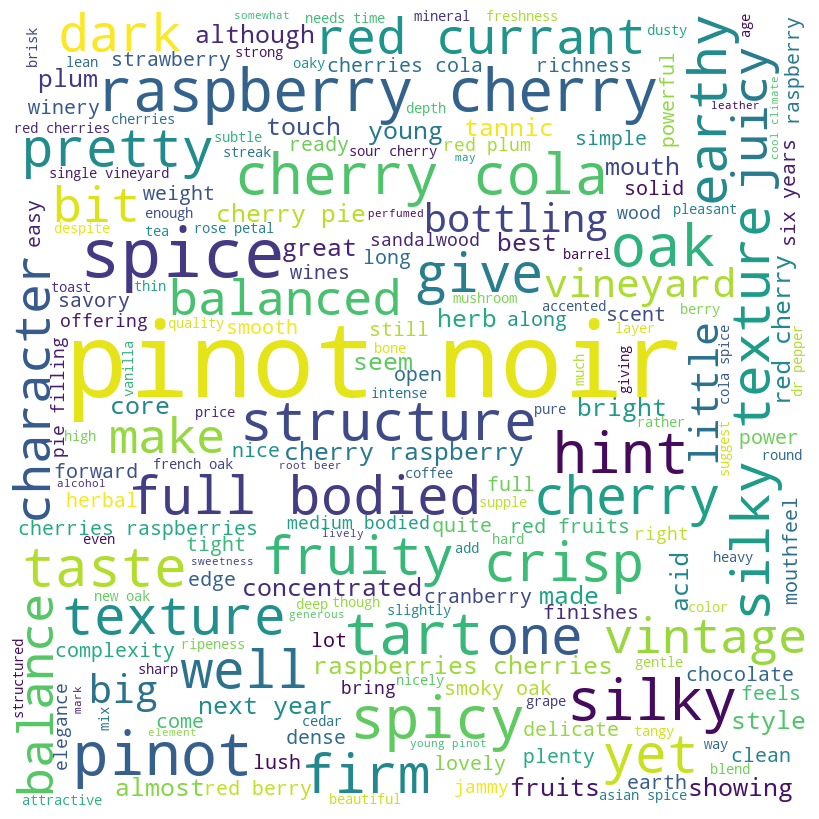

In [14]:
#Transform the list into a string

mystring = ""
for i in range(len(text_tokens)):
    for j in range(len(text_tokens[i])):
        mystring += " " + text_tokens[i][j]

# Construction of the wordcloud

stopwords = set(STOPWORDS)
addedstopwords = set(["fine","acidity","good","feel","dry","soft","delicious","strucutre","offers","complex","elegant","notes","shows","rich","light","aromas","palate","tannins","flavors","fresh","black","fruit","tannin","ripe","nose","balanc","offer","show","drink","wine","finish","flavor","palat","aroma","offer","note","eleg","barolo","sweet"])
stopwords.update(addedstopwords)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(mystring) 
wordcloud.recolor
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 